<a href="https://colab.research.google.com/github/NinaAbeyratne/Snaky---Snake-Identification-System/blob/Nina/Augmented_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive

In [2]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
# Giving directory location

mainDirectory = "/content/drive/MyDrive/DSGP Group 24/Dataset/Component 1/augmented"

In [4]:
# Types of the dataset images and its directory name
imageCategories = ["yes", "no"]

In [5]:
# Creating list to store the images as np
with_Snake_Data = []
with_No_Snake_Data = []

In [6]:
# Storing the images into a list
for classes in imageCategories:
    pathDirectory = os.path.join(mainDirectory, classes)
    for image in os.listdir(path=pathDirectory):
       # Taking images of all image directories
       image_array = cv2.imread(os.path.join(pathDirectory, image))
       if classes == "yes":
         with_Snake_Data.append(image_array)
       elif classes == "no":
         with_No_Snake_Data.append(image_array)


In [7]:
# Converting the lists into numpy arrays for animal types
with_Snake_Data = np.array(with_Snake_Data)
with_No_Snake_Data = np.array(with_No_Snake_Data)

In [8]:
#Checking for number of images in both list
with_Snake_Data.shape

(7308, 224, 224, 3)

In [9]:
with_No_Snake_Data.shape

(8844, 224, 224, 3)

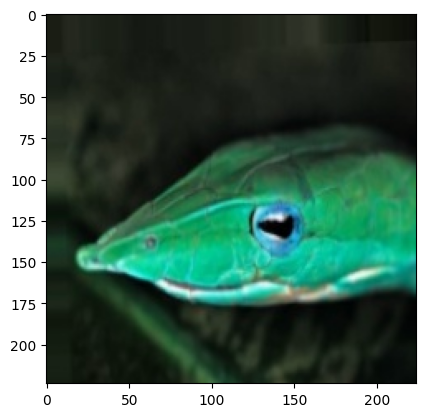

In [10]:
# Randomly checking for an image if the image is added to the list
plt.imshow(with_Snake_Data[10])

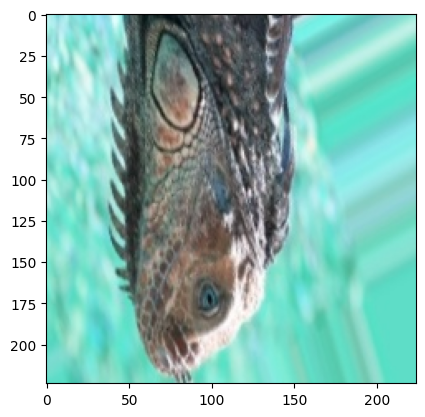

In [11]:
plt.imshow(with_No_Snake_Data[442])

In [12]:
# Deleting memory dump and cache in order to avoid memory issues
gc.collect()

55

In [13]:
# Types of the image dataset and its directory name
imageCategories = ["Yes", "No"]

# Combine image data and labels
allImages = np.concatenate([with_Snake_Data, with_No_Snake_Data], axis=0)

# Create corresponding labels based on the class names
allLabels = np.concatenate([
    np.full(len(with_Snake_Data), "Yes"),       # Label for images wiith Snakes
    np.full(len(with_No_Snake_Data), "No"),     # Label for images without with NO Snakes
], axis=0)

In [14]:
allImages.shape

(16152, 224, 224, 3)

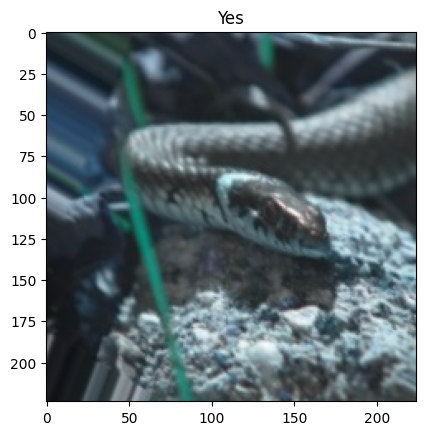

In [15]:
# Checking if all the images are properly labelled
plt.imshow(allImages[20])
plt.title(allLabels[20])
plt.show()

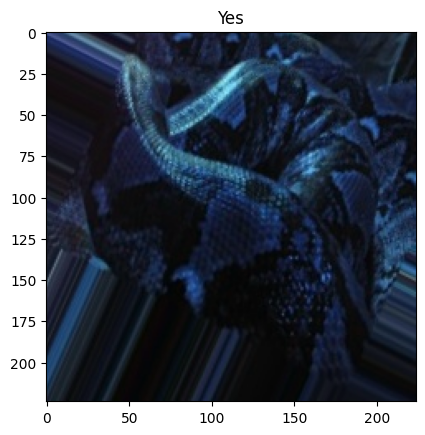

In [16]:
plt.imshow(allImages[200])
plt.title(allLabels[200])
plt.show()

In [17]:
# Spliting the dataset for train and test.
train_x, test_x, train_y, test_y = train_test_split(allImages, allLabels, test_size=0.2, random_state=4)

In [18]:
# Checking the number of images for test and train image dataset split
train_x.shape

(12921, 224, 224, 3)

In [19]:
train_y.shape

(12921,)

In [20]:
test_x.shape

(3231, 224, 224, 3)

In [21]:
test_y.shape

(3231,)

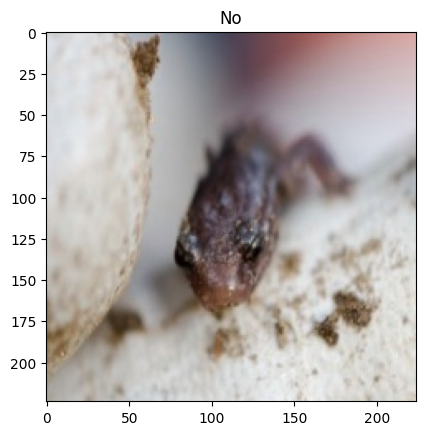

In [22]:
# Checking if the image is shuffled for the previous plotted image above
plt.imshow(train_x[3592])
plt.title(train_y[3592])
plt.show()

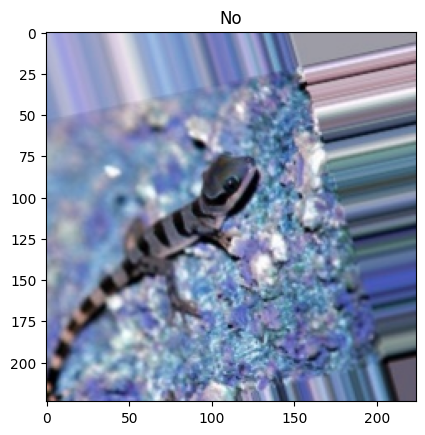

In [23]:
plt.imshow(test_x[200])
plt.title(test_y[200])
plt.show()

In [24]:

# Assuming train_y and test_y are your original labels, and train_x and test_x are your image data

# Use fit_transform on the training set labels
labelEncoder = LabelEncoder()
train_y_encoded = labelEncoder.fit_transform(train_y)

# Use transform on the test set labels
test_y_encoded = labelEncoder.transform(test_y)

# Main directory to store training and testing data
saveModelDataDirectory = "/content/drive/MyDrive/DSGP Group 24/Dataset/Component 1/Model_Data"

# Making two directories for both training and testing data sets
trainDirectory = os.path.join(saveModelDataDirectory, 'Train')
testDirectory = os.path.join(saveModelDataDirectory, 'Test')

# Categories of image classification
imageCategories = ["no", "yes"]

# Creating the subdirectories by checking whether they already exist
for category in imageCategories:
    os.makedirs(os.path.join(trainDirectory, category), exist_ok=True)
    os.makedirs(os.path.join(testDirectory, category), exist_ok=True)

# Save training images
for i in range(len(train_x)):
    category = imageCategories[int(train_y_encoded[i])]  # Use original labels here
    filename = f"{category}_train_{i}.jpg"
    filepath = os.path.join(trainDirectory, category, filename)
    cv2.imwrite(filepath, np.uint8(train_x[i]))

# Save testing images
for i in range(len(test_x)):
    category = imageCategories[int(test_y_encoded[i])]  # Use original labels here
    filename = f"{category}_test_{i}.jpg"
    filepath = os.path.join(testDirectory, category, filename)
    cv2.imwrite(filepath, np.uint8(test_x[i]))

# Perform garbage collection to free up memory
gc.collect()


7009